　신경망 학습에서 가중치 매개변수에 대한 손실 함수의 기울기를 수치 미분으로 구했다. **수치 미분은 구현하기 쉽지만 계산 시간이 오래 걸린다**는 큰 단점이 있다. 따라서 이번 장에서는 기울기를 효율적으로 계산하는 **오차역전파법(backpropagation)**을 다룬다.  
　  
## 5.1 계산 그래프  
　계산 그래프(computational graph)는 계산 과정을 복수의 노드(node)와 엣지(edge)로 표현한 것이다.  
　  
### 5.1.1 계산 그래프로 풀다
　계산 그래프에서 노드는 원으로 표기하고 원 안에는 연산 내용을 적는다. 또한, 계산 결과를 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전달한다. 계산 그래프의 사용법을 간단히 알아보기 위해 다음의 문제를 생각해보자.
- 1개에 100원짜리 사과 2개를 구입했다. 소비세 10%가 부과될 때 지불 금액을 구해보자.  


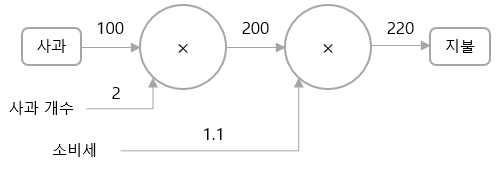  
  
계산 그래프로 해결한 답을 보면, 곱셈($\times$)을 연산으로, 나머지 사과의 가격, 사과의 개수, 소비세는 변수로 취급하고 있다.  
  
- 100원짜리 사과를 2개, 150원짜리 귤을 3개 구입했다. 소비세 10%가 부과될 때 지불 금액을 구해보자.  

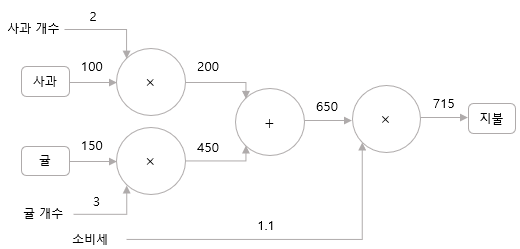  
  
　  
   
이처럼 계산 그래프를 이용한 문제 풀이는 계산을 왼쪽에서 오른쪽으로 진행하며 이를 **순전파(forward propagation)**라고 한다.  
　  
### 5.1.2 국소적 계산
　계산 그래프의 특징은 국소적 계산을 전파하여 최종 결과를 얻는다는 점이다. 국소적이란 자신과 직접 관계된 작은 범위를 뜻한다. 즉, 국소적 계산은 전체와 상관없이 독립적으로 자신과 관계된 정보만으로 결과를 출력할 수 있다는 점이다. 가령 앞선 두 번째 문제에서 사과의 경우 사과의 가격과 개수, 귤은 귤의 가격과 개수만 곱셈 연산하면 되며, 물품 값을 더하는 계산에서는 전달받은 수를 단지 합하기만 된다. 즉, 각 노드는 자신과 관련된 계산만 집중하면 된다. 따라서, 전체 계산이 복잡하더라도 이를 분해하면 단순한 계산(국소적 계산)으로 구성된다.  
  
### 5.1.3 왜 계산 그래프로 푸는가?
1. 국소적 계산: 복잡한 문제를 단순한 계산에 집중하여 문제를 단순화 가능
2. 중간 계산 결과 저장 가능
3. 역전파를 통해 미분을 효율적으로 계산 가능

　계산 그래프의 역전파(3번)를 살펴보기 위해 첫 번째 문제를 다시 살펴보자. 
- 1개에 100원짜리 사과 2개를 구입했다. 소비세 10%가 부과될 때 지불 금액을 구해보자.  

　여기서 만약 사과 가격이 변화가 지불 금액에 미치는 영향을 알고 싶다면 이는 사과 가격에 대한 지불 금액의 미분을 구하는 문제로 바라볼 수 있다. 사과 가격을 $x$, 지불 금액을 $L$이라 한다면 $\frac{\partial L}{\partial x}$를 구하는 것이다. 즉, 이 미분 값은 사과 가격이 '아주 조금' 올랐을 때 지불 금액이 얼마나 변화하는가를 표시한 것이다.  
  
　앞서 말했듯 사과 가격에 대한 지불 금액의 미분 값은 계산 그래프에서 역전파를 하면 구할 수 있다. 먼저 결과만을 나태난 그림을 살펴보자.  
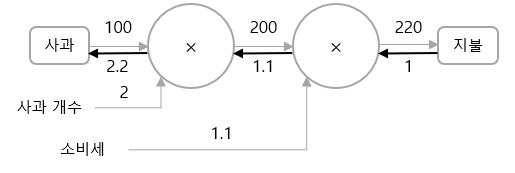  
  
　위 그림과 같이 역전파는 순전파와는 반대 방향의 화살표로 그린다. 이 전파는 '국소적 미분'을 전달하고 그 미분 값은 화살표 아래에 표시한다. 이 예에서 역전파는 오른쪽에서 왼쪽으로 1 → 1.1 → 2.2 순으로 미분 값을 전달한다. 결과를 살펴보면 '사과 가격에 대한 지불 금액의 미분' 값은 2.2라고 할 수있다. 즉, 사과가 1원 오르면 지불 금액은 2.2원 오른다는 뜻이다. 정확히는 사과 값이 아주 조금 오르면 지불 금액은 그 아주 작은 값의 2.2배만큼 오른다는 뜻이다.  
  
　사과 가격 이외에도 소비세에 대한 지불 금액의 미분, 사과 개수에 대한 지불 금액의 미분도 구할 수 있다. 이때는 중간까지 구한 미분 결과를 공유할 수 있어 다수의 미분을 효율적으로 계산할 수 있다. 이처럼 계산 그래프는 순전파와 역전파를 활용해 각 변수의 미분을 효율적으로 구할 수 있다는 장점이 있다.  
　  
## 5.2 연쇄법칙
　역전파는 '국소적' 미분을 순방향과는 반대로 오른쪽에서 왼쪽으로 전달한다. 이 국소적 미분을 전달하는 원리는 **연쇄법칙(chain rule)**에 따른 것이다.  
　  
### 5.2.1 계산 그래프의 역전파
$y=f(x)$라는 계산의 역전파를 그린 아래 예를 살펴보자.  
　
  
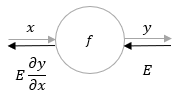  
  
　  　
    
   
　그림과 같이 역전파의 계산 절차는 신호 $E$에 노드의 국소적 미분($\frac{\partial y}{\partial x}$)을 곱한 후 다음 노드로 전달하는 것이다. 여기에서 국소적 미분은 순전파 때의 $y=f(x)$ 계산의 미분을 구한다는 뜻이며, 즉, $x$에 대한 $y$의 미분을 구하는 것이다. 이러한 계산 순서를 따른다면, 연쇄법칙의 원리로 인해 목표로 하는 미분 값을 효율적으로 구할 수 있다.  
　  
### 5.2.2 연쇄법칙이란?
　우선 합성 함수부터 시작해보자. **합성 함수**란 여러 함수로 구성된 함수를 말한다.  

\begin{equation}
z = t^2 \\
t = x+y
\end{equation}  
  
　연쇄법칙은 **합성 함수의 미분에 대한 성질**이며, *합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.*   
 
이것이 연쇄법칙의 원리이다. 즉, 식 (1)에서 $x$에 대한 $z$의 미분은 다음과 같이 쓸 수 있다.  
  
\begin{equation}
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\frac{\partial t}{\partial x}
\end{equation}  


또한, 식 (2)는 다음과 같이 $\partial t$를 서로 지울 수 있다.  

$$\frac{\partial z}{\partial x} = \frac{\partial z}{}\frac{}{\partial x}$$  
  
따라서, 식 (2)에서 연쇄법칙을 사용해 $x$에 대한 $z$의 미분을 구하는 과정을 살펴보면 다음과 같다. 먼저, 식 (2)에서의 국소적 미분(편미분)을 구한다.  

\begin{equation}
\frac{\partial z}{\partial t} = 2t \\
\frac{\partial t}{\partial x} = 1
\end{equation}  
 
　최종적으로 구하고 싶은 $x$에 대한 $z$의 미분은 식 (3)에서 구한 두 미분을 곱해서 계산한다.  

\begin{equation}
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x+y)
\end{equation}  
  
　  
### 5.2.3 연쇄법칙과 계산 그래프
식 (4)의 연쇄법칙 게산을 계산 그래프로 나타내보자(제곱 연산은 \*\*2로 표기).  

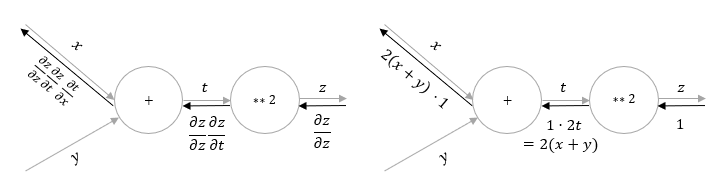
　  
   
　위 그림과 같이 역전파의 계산 절차에서는 노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달한다. 예를 들어, '\*\*2'노드를 보면, 입력은 $\frac{\partial z}{\partial z}$이며 이에 국소적 미분인 $\frac{\partial z}{\partial t}$(여기서, 순전파였다면 입력이 $t$, 출력이 $z$이므로 이 노드에서의 국소적 미분은 $\frac{\partial z}{\partial t}$가 된다.)을 곱하고 다음 노드로 넘긴다. 가장 왼쪽의 역전파는 연쇄법칙에 따라 $\frac{\partial z}{\partial z}\frac{\partial z}{\partial t}\frac{\partial t}{\partial x} = \frac{\partial z}{\partial x}$가 되어 '$x$에 대한 $z$의 미분'이 된다. 즉, **역전파가 하는 일은 연쇄법칙의 원리와 동일하다.**  
  
　  
## 5.3 역전파
　앞 절에서 계산 그래프의 역전파가 연쇄법칙에 따라 진행되는 모습을 살펴봤다면, 이번 절에서는 덧셈과 곱셉 등의 연산을 예로 들어 역전파의 구조를 살펴보자.  
　  
### 5.3.1 덧셈 노드의 역전파
　$z=x+y$라는 식을 대상으로 역전파를 살펴보자. 다음은 해석적으로 계산한 결과이다.  

\begin{equation}
\frac{\partial z}{\partial x} = 1 \\
\frac{\partial z}{\partial y} = 1
\end{equation}  
  
즉, 덧셈 노드의 역전파는 상류에서 전해진 미분($\frac{\partial L}{\partial z}$)에 1을 곱해 그대로 입력된 값을 다음 노드로 보내게 된다. 이를 그림으로 나타내면 다음과 같다.  

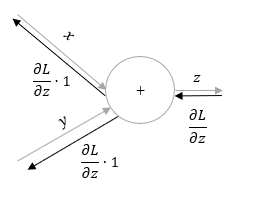    
　  
이제 구체적인 예를 살펴보자. 예를 들어 $10+5=15$라는 계산이 있고, 상류에서 $1.3$이라는 값이 흘러온다. 이를 계산 그래프로 나타내면 다음과 같이 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력할 뿐이므로 1.3을 그대로 다음 노드로 전달한다.  

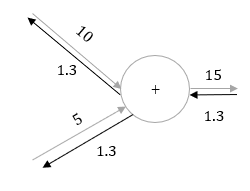  
  
　  
### 5.3.2 곱셈 노드의 역전파
　이번에는 $z=xy$를 생각해보자. 미분의 결과는 다음과 같다.  
  
\begin{equation}
\frac{\partial z}{\partial x} = y \\
\frac{\partial z}{\partial y} = x
\end{equation}  
  
　곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호드를 **서로 바꾼 값**을 곱해서 하류로 흘려보낸다. 즉, 순전파 때 $x$였다면 역전파일 때는 $y$를, 순저파에서 $y$였다면 역전파에서는 $x$로 바꾼다.  
  
　구체적인 예로 $10\times 5 = 50$이라는 계산이 있고, 역전파 때 상류에서 1.3이 흘러온다고 생각해보자. 그러면 다음과 같은 계산 그래프로 역전파를 나타낼 수 있다.  
 
   
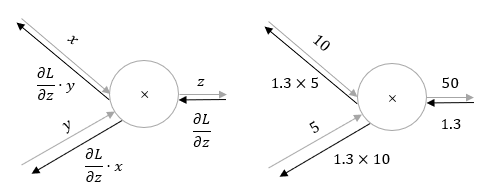  
  
따라서, 덧셈의 역전파에서는 순방향 입력 신호 값이 필요하지 않지만, **곱셈의 역전파에서는 순방향 입력 신호의 값이 필요하다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다.**  
  

## 5.4 단순한 계층 구현하기
이번 장에서는 지금까지 본 사과 쇼핑의 예를 파이썬으로 구현한다. 계산 그래프의 곱셈 노드를 `MulLayer`, 덧셈 노드를 `AddLayer`라는 이름으로 구현한다.  
　  
### 5.4.1 곱셈 계층
　모든 계층은 `forward()`와 `backward()`라는 공통의 메서드를 갖도록 구현한다. 곱셈 계층을 `MulLayer`라는 이름의 클래스로 다음과 같이 구현할 수 있다.

In [1]:
class MulLayer():
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y   # x와 y를 바꿈
        dy = dout * self.x
        
        return dx, dy

　`__init__()`에서는 인스턴스 변수인 `x`, `y`를 초기화한다. 이 두 변수는 순전파 시의 입력 값을 유지하기 위해 사용한다. `forward()`에서는 `x`와 `y`를 인수로 받고 두 값을 곱해서 반환한다. 반면 `backward()`에서는 상류에서 넘어온 미분 `dout`에 순전파 때의 값을 **서로 바꿔** 곱한 후 하류로 흘려보낸다.  
  
　곱셈 계층을 구현한 `MulLayer`를 사용해 앞서 본 사과 쇼핑의 예에서 순전파를 구현해보자.  
 
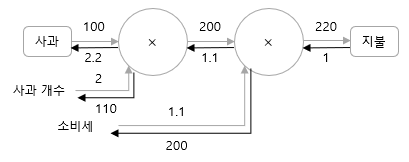

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


　  
  다음으로 각 변수에 대한 미분을 구해보자.

In [3]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


　  
   
`backward()`의 호출 순서는 `forward()`와 반대라는 점과 `backward()`가 받는 인수는 **순전파의 출력에 대한 미분**임을 주의하자. 예를 들어, `mul_apple_layer`라는 곱셈 계층은 순전파 때는 `apple_price`를 출력하지만, 역전파 때는 `apple_price`의 미분 값인 `dapple_price`를 인수로 받는다.  
　  
### 5.4.2 덧셈 계층
덧셈 계층은 다음과 같이 구현할 수 있다.

In [4]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

덧셈 계층에는 초기화가 필요 없어 `__init__()`에서는 `pass`를 통해 아무 일도 하지 않는다.  
　  
이제 아래 그림처럼 사과 2개와 귤 3개를 사는 상황을 구현해보자.  
  
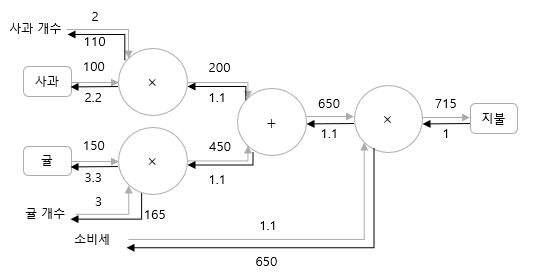  
　  


In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)              # 1
orange_price = mul_orange_layer.forward(orange, orange_num)           # 2
add_price = add_apple_orange_layer.forward(apple_price, orange_price)# 3
price = mul_tax_layer.forward(add_price, tax)                        # 4

# 역전파
dprice = 1
dadd_price, dtax = mul_tax_layer.backward(dprice)                        # 4
dapple_price, dorange_price = add_apple_orange_layer.backward(dadd_price)# 3
dorange, dorange_num = mul_orange_layer.backward(dorange_price)          # 2
dapple, dapple_num = mul_apple_layer.backward(dapple_price)              # 1

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


　  

이처럼 계산 그래프에서의 계층(여기서는 덧셈과 곱셈)은 쉽게 구현할 수 있으며, 이를 사용한 복잡한 미분도 계산 가능하다.  
　  
## 5.5 활성화 함수 계층 구현하기
　여기에서는 신경망을 구성하는 층 각각을 클래스 하나로 구현해보자. 우선을 활성화 함수인 ReLU와 Sigmoid 계층을 구현해보자.  
　  
### 5.5.1 ReLU 계층
　활성화 함수로 사용되는 ReLU의 수식은 식 (7)과 같다.

\begin{equation}
y=
\begin{cases}
x, & \mbox{if }x > 0 \\
0, & \mbox{if }x \le 0
\end{cases} 
\end{equation}  
　 
  
　식 (7)에서 $x$에 대한 $y$의 미분은 식 (8)처럼 구한다.  

\begin{equation}
\frac{\partial y}{\partial x}=
\begin{cases}
1, & \mbox{if }x > 0 \\
0, & \mbox{if }x \le 0
\end{cases} 
\end{equation}  
　  
　식 (8)과 같이 순전파 입력 $x$가 0보다 크면 역전파는 상류의 값을 그대로, 반대로 순전파 때 $x$가 0보다 작거나 같다면 역전파 때는 하류로 신호를 보내지 않는다. 계산 그래프로는 다음과 같이 나타낼 수 있다.  
- 그림 1  

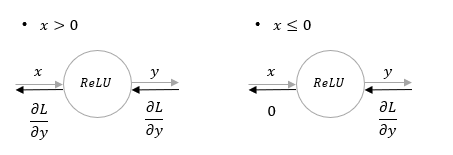  
　  
   
　ReLU 계층의 구현은 다음과 같다. 이때 신경망 계층의 `forward()`와 `backward()`는 넘파이 배열을 인수로 받는다고 가정하자.

In [6]:
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

　`ReLU` 클래스는 `True`/`False`로 구성된 `mask`라는 인스턴스 변수를 가진다. 이때 순전파의 입력 $x$가 0보다 작거나 같으면 `True`를 갖고 아니면 `False`를 갖는다. <그림 1>과 같이 순전파 때의 입력 값이 0 이하면 역전파 때의 값은 0이 되어야 하므로 `mask`를 이용해 원소가 `True`인 곳에는 상류에서 전파된 `dout`을 0으로 설정한다.  
　  
### 5.5.2 Sigmoid 계층
　시그모이드 함수는 식 (9)와 같다.  

\begin{equation}
y = \frac{1}{1 + \exp{(-x)}}
\end{equation}  
　  
   
　계산 그래프로는 다음과 같이 나타낼 수 있다.  
　  
   
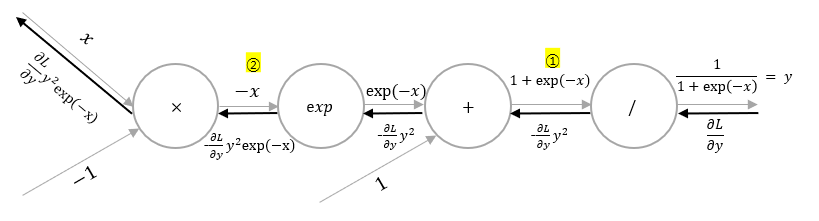  
  
계산 그래프를 사용한 시그모이드 함수의 미분은 사실 아래 과정과 동일하다.

\begin{equation}
\begin{aligned}
\frac{dy}{dx} &= \frac{d}{dx}(1+\exp{(-x)})^{-1} \\
&= -(1+\exp{(-x)})^{-2} \frac{d}{dx}(1+\exp{(-x)}) \\
&= -(1+\exp{(-x)})^{-2} \exp{(-x)} \\ 
&= \frac{\exp{(-x)}}{(1+\exp{(-x)})^{2}} \\
&= \frac{1+\exp{(-x)}}{(1+\exp{(-x)})^{2}} - \frac{1}{(1+\exp{(-x)})^{2}} \\
&= \frac{1}{1+\exp{(-x)}} - \frac{1}{(1+\exp{(-x)})^{2}} \\
&= \frac{1}{1+\exp{(-x)}} (1 - \frac{1}{1+\exp{(-x)}}) \\
\\
&= y(1-y)
\end{aligned}
\end{equation}  
　  
   
　식 (10)을 보면 알겠지만, **Sigmoid 계층의 역전파는 순전파의 출력($y$)만으로 계산할 수 있다.** 또한, 다음 그림과 같이 단순한 계산 그래프에서의 sigmoid 노드 하나로 대체할 수 있다.  
　  
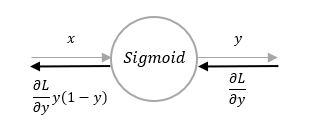  

　  
   
그럼 Sigmoid 게층을 구현해보자.

In [7]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * self.out * (1.0 - self.out)
        
        return dx

이 구현에서는 순전파의 출력을 인스턴스 변수 `out`에 보관했다가, 역전파 계산 때 그 값을 사용한다.  
　  
## 5.6 Affine / Softmax 계층 구현하기
　  
### 5.6.1 Affine 계층
　신경망의 순전파에서는 가중치 신호의 총합($Y=XW+B$)을 계산하기 때문에 행렬의 곱(내적; `np.dot()`)을 사용했다. 이때 행렬의 차원이 서로 맞아야 $XW$를 계산할 수 있는데, 예를 들어 다음과 같아야 한다.  

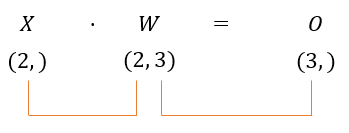  
  
　이처럼 신경망의 순전파 때 수행하는 내적을 기하학에서는 **어파인 변환(affine transformation)**이라고 한다. 그럼 가중치 신호의 총합을 계산하는 과정(`np.dot(X, W) + B`)을 계산 그래프로 그려보자.  

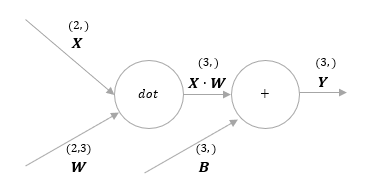

　간단한 그래프이지만, 여기서의 $X, W, B$는 모두 **행렬(다차원 배열)이란 점에 주의**하자.  

　다차원 배열에서의 역전파를 이해하기 위해서는 다음과 같은 행렬의 미분을 알아야 한다. 아래 식은 역전파에서 입력 $X$에 대한 loss function $L$의 변화와 가중치 $W$에 대한 loss function $L$의 변화를 뜻한다.
  
  
\begin{align}
\frac{\partial L}{\partial X} &= \frac{\partial L}{\partial Y} \cdot W^T \\
\frac{\partial L}{\partial W} &= X^T \cdot \frac{\partial L}{\partial Y}
\end{align}  

　이제 Affine 계층의 계산 그래프를 나타내면 다음과 같다. 이때 각 변수의 shape에 집중해서 보자. $L$이 스칼라이므로 $X$와 $\frac{\partial L}{\partial X}$는 같은 shape고, $W$와 $\frac{\partial L}{\partial W}$도 같은 shape를 가진다. 이를 잘 생각하면, Affine 계층의 역전파를 떠올리기 쉬워진다. 

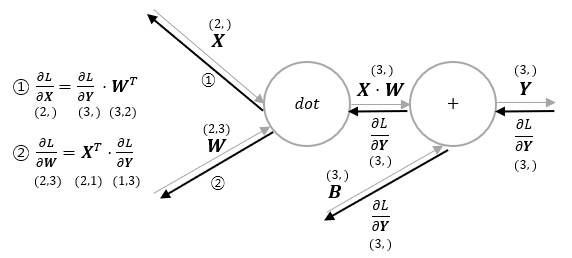  
  
　  
### 5.6.2 배치용 Affine 계층  
　지금까지의 Affine 계층은 입력 데이터로 $X$ 하나만을 고려한 것이었다. 이번에는 데이터가 N개를 묶어서 순전파하는 경우의 배치용 Affine 계층을 생각해보자. 이때 묶은 데이터를 '배치'라고 부른다. 계산 그래프로는 다음과 같다.  

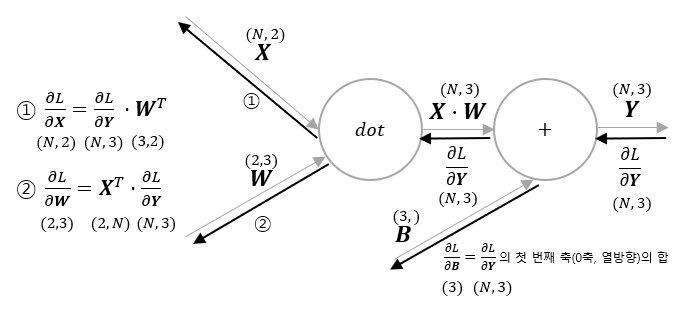  
  
　이때 두 가지 부분에 주의해야 한다. 첫 번째는 입력 $X$의 shape가 (N,2)가 되었다는 것이다. 두 번째는 편향 덧셈인데, 순전파 때의 편향 덧셈은 $X\cdot W$에 대한 편향이 각 데이터에 더해진다. 예를 들어, 데이터가 두 개(N=2)인 경우, 편향은 두 데이터 각각의 계산 결과에 각각 더해진다. 구체적인 예를 보자.

In [8]:
import numpy as np
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [9]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

　  
   
즉, 순전파의 편향 덧셈은 각각의 데이터에 더해지는데, 그래서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다. 코드로는 다음과 같다.

In [10]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

　Affine 계층의 구현은 다음과 같다.

In [12]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dw = np.dot(self.X.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

### 5.6.3 Softmax-with-Loss 계층
　마지막으로 출력층에서 사용하는 Softmax 함수에 관해 살펴보자. 앞에서 언급했듯 Softmax 함수는 입력 값을 정규화(출력의 합이 1이 되도록)하여 출력한다. 예를 들어 손글씨 숫자 인식의 경우 10클래스 분류 문제이므로 Softmax 계층의 입력은 10개가 된다.  
　  
   
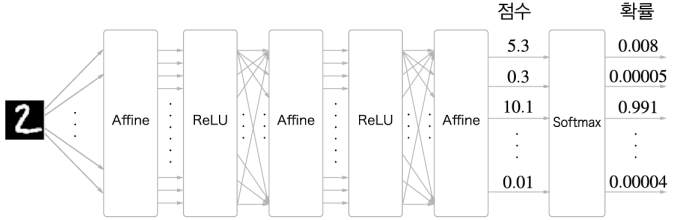  
　   
    
　이제 Softmax 계층을 구현해보자. 이때, 손실 함수인 교차 엔트로피 오차도 포함해서 Softmax-with-Loss 계층이라는 이름으로 구현한다. 먼저 Softmax-with-Loss 계층의 계산 그래프를 살펴보자.  
　  
 

　  
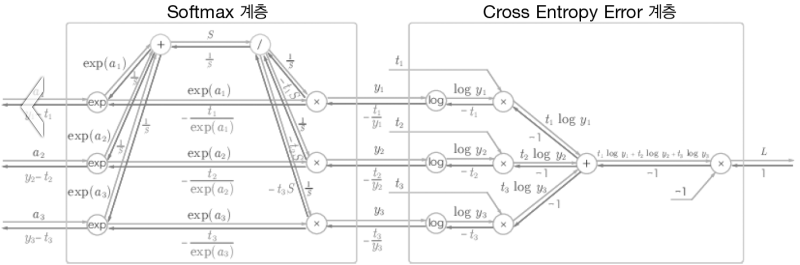  

　이를 간략화하면 다음과 같다.  
　  


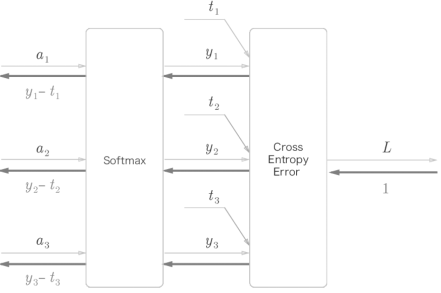

　  
   
　위 그림에서는 3개의 클래스 분류를 가정했다. Softmax 계층은 이전 계층에서 3개의 입력 $(a_1, a_2, a_3)$를 받아 이를 정규화하여 $(y_1, y_2, y_3)$를 출력한다. Cross Entropy Error 계층은 Softmax의 출력 $(y_1, y_2, y_3)$와 정답 $(t_1, t_2, t_3)$를 입력 받고, 이 데이터들로부터 손실 $L$을 출력한다.  
  
　역전파의 결과를 주목해보자. **Softmax 계층의 역전파는 출력 $y$와 정답 $t$의 차이인 $(y_1 - t_1, ~y_2 - t_2,~ y_3 - t_3)$이다**. 즉, 신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것이다. 소프트맥스 함수의 손실함수로 교차 엔트로피 오차를 사용해서 말끔히 떨어지는 결과는 우연이 아니라 교차 엔트로피 오차라는 함수가 그렇게 설계되었기 때문이다(마찬가지로 회귀의 출력층에서 사용하는 '항등 함수'의 손실 함수로 '오차제곱합'을 사용하면 같은 결과가 나온다).  
  
　가령 정답 레이블이 (0, 1, 0)일 때, Softmax 계층이 (0.3, 0.2, 0.5)를 출력했다면 Softmax 계층의 역전파는 (0.3, -0.8, 0.5)라는 커다란 오차를 전파한다. 결과적으로 Softmax 계층의 앞 계층들은 그 오차로부터 크게 변화할 것이다. 반대로 Softmax 계층이 (0.01, 0.99, 0)을 출력했다면, Softmax 계층의 역전파가 보내는 오차는 (0.01, -0.01, 0)이다. 즉, 앞 계층으로 전달하는 오차가 작으므로 학습하는 정도도 작아진다.  
  
　그럼 Softmax-with-Loss 계층을 구현해보자.

In [13]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # loss
        self.y = None # softmax의 출력
        self.t = None # 정답 레이블(one-hot vector)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

　**역전파 때는 전파하는 값을 배치의 수(`bacth_size`)로 나눠서 데이터 한 개당 오차를 앞 계층으로 전파한다는 점에 주의하자.**

## 5.7 오차역적파법 구현하기
앞 절에서 구현한 계층을 조합해 신경망을 구축할 수 있다.  
　  
   
### 5.7.1 신경망 학습의 전체 그림
다음은 신경망 학습의 순서다. 오차역전파법이 등장하는 단계는 2단계의 기울기 산출 부분이다. 4장에서는 이러한 기울기를 구하기 위해 수치 미분을 이용했는데, 구현은 쉽지만 매우 오랜 시간이 걸렸다. 하지만 오차역전파법을 이용하면 기울기를 효율적이고 빠르게 구할 수 있다. 

- 전제  

신경망에는 적응 가능한 가중치($w$)와 편향($b$)이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 **학습**이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.  

- 1단계 - 미니배치  

훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 **미니배치**라고 하며, 그 미니배치의 손실을 줄이는 것이 목표다.  

- 2단계 - 기울기 산출   

미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기(gradient)를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.  

- 3단계 - 매개변수 갱신  

가중치 매개변수를 기울기 방향으로 아주 조금($\eta$) 갱신한다.  

- 4단계 - 반복  

1\~3단계를 반복한다.  
　  
### 5.7.2 오차역전파법을 적용한 신경망 구현하기
구현하고자 하는 2층 신경망 `TwoLayerNet` 클래스의 인스턴스 변수와 메서드를 살펴보자.  

|인스턴스 변수|설명|
|---|---|
|params|딕셔너리 변수로, 신경망의 매개변수 보관|
|layers|순서가 있는 딕셔너리 변수로, 신경망의 계층을 보관|
|lastLayer|신경망의 마지막 계층|  
  
|메서드|설명|
|---|---|
|__init__()|초기화 수행|
|predict()|예측을 수행|
|loss()|손실함수 값 계산|
|accuracy()|정확도 계산|
|numerical_gradient()|가중치 매개변수의 기울기를 수치 미분 방정식으로 계산|
|gradient()|가중치 매개변수의 기울기를 오차역전파법으로 계산|

In [14]:
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()  # 계층 순서대로 저장하기 위함
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)   # 계층 순서대로 input 투입
            
        return x
    
    # x: input, t: true label
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)   # 가장 높은 클래스
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # 수치미분
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    # 오차역전파법
    def gradient(self, x, t):
        # 순전파 결과
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)  # y-t
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # save results
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

　위 구현에서 주목할만한 점은 우선 `OrderedDict()`을 사용해 순서를 기억한다는 점이다. 그래서 순전파 때는 추가한 순서대로 각 계층의 `forward()` 메서드를 호출하기만 하면 된다. 마찬가지로 역전파 때는 계층을 반대로(`reverse()`) 호출해 `backward()`를 수행하면 된다. 이처럼 신경망의 구성 요소를 **계층**으로 구현하면 신경망을 쉽게 구축할 수 있다.  
  
　  
### 5.7.3 오차역적파법으로 구한 기울기 검증하기
　수치 미분은 느리지만 구현하기 쉽고 버그가 숨어있기 어렵다. 따라서 복잡하기 때문에 실수하기 쉬운 오차역전파법을 제대로 구현했는지 검증하는 데 사용할 수 있다. 이처럼 두 방식으로 구한 기울기가 일치하는지 확인하는 작업을 **기울기 확인(gradient check)**이라고 한다.

In [15]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치 차이의 절댓값 평균
for k in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[k] - grad_numerical[k]))
    print(k + ":" + str(diff))

W1:3.875420808505613e-10
b1:2.4658489279345657e-09
W2:5.49885896567171e-09
b2:1.3967237864342952e-07


　위 결과는 수치 미분과 오차역적파법으로 구한 미분의 차이가 매우 적다는 것을 나타낸다.  
  
　  

### 5.7.4 오차역전파법을 사용한 학습 구현하기
　마지막으로 오차역전파법을 사용한 신경망 학습을 구현해보자.

In [16]:
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 오차역전파법으로 기울기 구하기
    grad = network.gradient(x_batch, t_batch)
    
    # 갱신
    for k in ('W1', 'b1', 'W2', 'b2'):
        network.params[k] -= learning_rate * grad[k]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train accuracy: {:.4f}, test accuracy: {:.4f}'.format(train_acc, test_acc))

train accuracy: 0.1587, test accuracy: 0.1568
train accuracy: 0.9048, test accuracy: 0.9098
train accuracy: 0.9254, test accuracy: 0.9277
train accuracy: 0.9386, test accuracy: 0.9376
train accuracy: 0.9449, test accuracy: 0.9437
train accuracy: 0.9533, test accuracy: 0.9524
train accuracy: 0.9590, test accuracy: 0.9578
train accuracy: 0.9644, test accuracy: 0.9608
train accuracy: 0.9680, test accuracy: 0.9646
train accuracy: 0.9698, test accuracy: 0.9641
train accuracy: 0.9728, test accuracy: 0.9679
train accuracy: 0.9745, test accuracy: 0.9673
train accuracy: 0.9756, test accuracy: 0.9693
train accuracy: 0.9764, test accuracy: 0.9694
train accuracy: 0.9787, test accuracy: 0.9715
train accuracy: 0.9791, test accuracy: 0.9719
train accuracy: 0.9804, test accuracy: 0.9715


　  
## 5.8 정리
　이번 장에서는 계산 그래프를 이용해 신경망의 동작과 오차역전파법을 살펴보고, 그 처리 과정을 계층이라는 단위로 구현했다. 이와 같은 모듈화를 통해 신경망 계층을 자유롭게 조합하여 원하는 신경망을 쉽게 만들 수 있다.